In [1]:
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

# Projet house prices

## data

### Etape 1 : Recuperer la base de donnée train.csv

### Créer un notebook avec un titre et importer train.csv dans un dataframe

In [2]:
url="https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/bdfc59ed-c3c7-48ac-a3d3-9e54663f6c1d.csv"
train = pd.read_csv(url)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Etape 2 : Comprendre la signification de chaque colonne

In [3]:
train.shape

(1460, 81)

In [4]:
#train.info()

In [5]:
# je recupere les valeur nan

sum(train.isna().sum())

6965

In [80]:
# je modifie les valeurs nan

for name in train.columns:
    x = train[name].isna().sum()
    if x > 0:
        val_list = np.random.choice(train.groupby(name).count().index, x, p=train.groupby(name).count()['Id'].values /sum(train.groupby(name).count()['Id'].values))
        train.loc[train[name].isna(), name] = val_list

In [81]:
# plus de valeur nan a présent

sum(train.isna().sum())

0

In [17]:
#train.describe()

In [83]:
# je cherche les corrélations entre mes variable avec comme target Sale Price
#train.corr()

### Target

In [10]:
# SalePrice:  le prix de vente de la propriété en dollars

In [11]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Features

In [19]:
# OverallQual ==> Qualifé globale
# YearBuilt 
# YearRemodAdd
# MasVnrArea ==> taille de l'appartement au m2

In [13]:
train_2 = train[['SalePrice', 'OverallQual', 'YearRemodAdd', 'MasVnrArea']]
train_2

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea
0,208500,7,2003,196.0
1,181500,6,1976,0.0
2,223500,7,2002,162.0
3,140000,7,1970,0.0
4,250000,8,2000,350.0
...,...,...,...,...
1455,175000,6,2000,0.0
1456,210000,6,1988,119.0
1457,266500,7,2006,0.0
1458,142125,5,1996,0.0


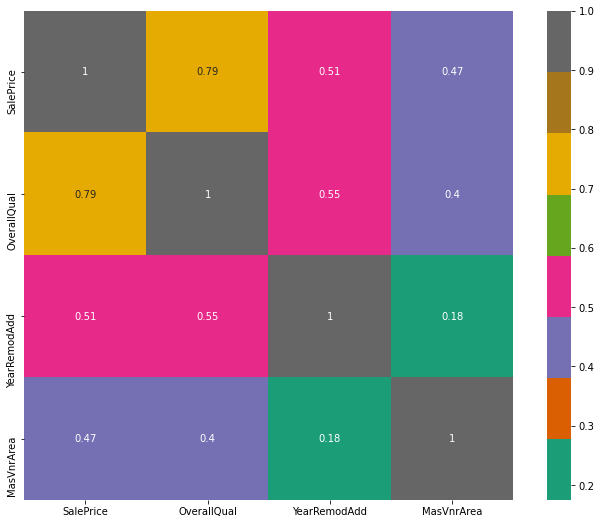

In [14]:
corrmat = train_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True, cmap="Dark2");

In [ ]:
On se rend compte que les features qui impact le plus notre target qui est le prix de vente des propriétes semble cohérentes:
la taille des proprietes
la qualite des proriete
l'annee de rénovation

dans une second partie peut etre pourrront nous regarder par quartier 


## model

### Faites une regression lineaire avec une feature. Choisir une feature qui n'a pas besoin d'être transformée

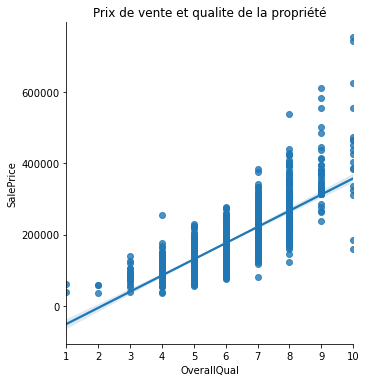

In [84]:
sns.lmplot(x="OverallQual", y="SalePrice", data=train_2).set(title='Prix de vente et qualite de la propriété')

In [85]:
# je remplace les lignes ayant 0 comme valeur avec la moyenne des superficies

train_2['MasVnrArea']=train_2['MasVnrArea'].replace(0.0,train_2['MasVnrArea'].mean())

<ipython-input-85-0483291a5526>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2['MasVnrArea']=train_2['MasVnrArea'].replace(0.0,train_2['MasVnrArea'].mean())


In [86]:
#train_2

###  Faites une regression lineaire avec Stats model et interpreter les résultats.

In [66]:
mod = smf.ols(formula='SalePrice ~ OverallQual + MasVnrArea', data=train_2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1387.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        11:28:40   Log-Likelihood:                -17766.
No. Observations:                1460   AIC:                         3.554e+04
Df Residuals:                    1457   BIC:                         3.555e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -8.93e+04   5556.391    -16.071      0.000      -1e+05   -7.84e+04
OverallQual  4.166e+04    944.257     44.124      0.000    3.98e+04    4.35e+04
MasVnrArea     96.8682      8.591     11.275      0.000      80.016     113.721
==============================================================================
Omnibus:                      492.089   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4887.865
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                      11.593   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# observation:
# R carré a 0,656 acceptable mais pas optimal
# mes p values sont bonne étant a 0

In [72]:
# j'affiche le coef des parametres de mon model

print('Parameters: ', res.params)
print('R2: ', res.rsquared)

Parameters:  Intercept     -89295.297481
OverallQual    41664.277689
MasVnrArea        96.868167
dtype: float64
R2:  0.6556948660252457


In [ ]:
### création d'un programme de prédiction d'une fourchette de prix

In [51]:
# je multiplie mes coef avec les valeur de mon dataframe pour l'exemple  id 0

result = res.params['OverallQual']*7 + res.params['MasVnrArea']*196 + res.params['Intercept']
print(f' Le miles par gallon pour id: 0 est \n {result}')

 Le miles par gallon pour id: 0 est 
 221340.80715577363


In [64]:
def prediction_mpg(OverallQual, MasVnrArea):
    result = res.params['OverallQual']*OverallQual + res.params['MasVnrArea']*MasVnrArea + res.params['Intercept']
    result_min = round((res.rsquared * result) ,2)
    result_max = round(((1 - res.rsquared) * result + result),2)
    return f'cette propriété sera vendu entre {result_min} et {result_max} selon notre model' 

In [65]:
print(prediction_mpg(OverallQual=6, MasVnrArea=119.000000))


cette propriété sera vendu entre 112922.25 et 231513.11 selon notre model


### Etape 7 : Faites une regression lineaire avec sklearn et interpreter les les résultats